# Inserción en Árbol B

La inserción en un árbol B es un proceso fundamental para mantener la estructura y las propiedades de estos árboles. Un árbol B es una estructura de datos de árbol autoequilibrada, diseñada para almacenar datos de manera eficiente para operaciones de búsqueda, inserción y eliminación en sistemas de almacenamiento basados en discos. Antes de detallar el proceso de inserción, es crucial entender el concepto de "grado" en un árbol B.

El "grado" de un árbol B, denotado comúnmente como \( t \), se refiere al número mínimo de hijos que un nodo no raíz puede tener. Vale la pena mencionar que este grado también determina el número máximo de hijos que cualquier nodo puede tener, que es \( 2t \). Por lo tanto, el número de claves (valores) que un nodo puede contener varía entre \( t-1 \) y \( 2t-1 \), haciendo a los árboles B muy eficientes en términos de balance y minimización de la altura del árbol.

## Proceso de Inserción

La inserción en un árbol B sigue estos pasos esenciales para asegurar que el árbol se mantenga equilibrado y ordenado:

1. **Localizar el Nodo Correcto:** El primer paso es encontrar el nodo hoja donde debería insertarse la nueva clave. Esto se hace descendiendo desde la raíz, eligiendo el hijo adecuado en cada paso basado en las comparaciones de la clave a insertar.

2. **Inserción en el Nodo Hoja:** Si el nodo hoja encontrado tiene menos de \( 2t-1 \) claves, insertamos la nueva clave en la posición correcta para mantener el orden del nodo.

3. **División de Nodos:** Si el nodo hoja está lleno (tiene \( 2t-1 \) claves), se divide en dos nodos, cada uno con \( t-1 \) claves, y la clave mediana se promueve al nodo padre. Si el nodo padre también está lleno, este proceso de división se repite hacia arriba hasta que se encuentre un nodo que no esté lleno o hasta que se cree una nueva raíz si es necesario.

4. **Creación de una Nueva Raíz:** Si la raíz se divide, se crea una nueva raíz que tiene como hijos los dos nodos resultantes de la división de la antigua raíz.

## Implementación en Python

In [1]:
# Definición de la clase para un Nodo del Árbol B
class BTreeNode:
    # Inicializador del nodo con opción de especificar si es hoja
    def __init__(self, leaf=False):
        # Determina si el nodo es una hoja
        self.leaf = leaf
        # Lista de llaves en el nodo
        self.keys = []
        # Hijos del nodo
        self.children = []

        print("Nodo BTree inicializado como hoja" if leaf else "Nodo BTree inicializado")

# Clase del árbol B que contiene las operaciones fundamentales
class BTree:
    # Constructor del árbol B que establece grado mínimo t y crea raíz
    def __init__(self, t):
        # La raíz del árbol inicialmente es una hoja hasta que se inserten más
        # valores
        self.root = BTreeNode(True)
        # Grado mínimo del árbol (determina tamaño máximo y mínimo de cada nodo)
        self.t = t

        print("Árbol B inicializado con grado mínimo", t)

    # Función para insertar una nueva llave en el árbol
    def insert(self, k):
        root = self.root
        # Si la raíz está llena, el árbol crece en altura
        if len(root.keys) == (2*self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            # La antigua raíz ahora es hija de la nueva raíz
            temp.children.insert(0, root)
            # Se divide la antigua raíz ya que estaba llena
            self.split_children(temp, 0)
            # Insertamos la llave en el árbol no lleno
            self.insert_non_full(temp, k)
        else:
            # Insertamos directamente si la raíz no está llena
            self.insert_non_full(root, k)

        print("Llave insertada:", k)

    # Inserta una llave en un nodo que asume no está lleno
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            # Agrega espacio para la nueva llave
            x.keys.append((None, None))
            # Encuentra la posición para la nueva llave
            while i >= 0 and k < x.keys[i]:
                x.keys[i+1] = x.keys[i]
                i -= 1
            # Inserta la nueva llave en su posición encontrada
            x.keys[i+1] = k

            print("Llave insertada en nodo hoja.")
        else:
            # Si no es una hoja, encuentra el hijo correcto donde insertar la
            # nueva llave
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            # Divide el hijo si está lleno antes de la inserción
            if len(x.children[i].keys) == (2*self.t) - 1:
                self.split_children(x, i)
                if k > x.keys[i]:
                    i += 1
            # Hace llamada recursiva al hijo correcto
            self.insert_non_full(x.children[i], k)

            print("Navegando hacia hijo para continuar inserción.")

    # Divide el hijo del nodo x en la posición i
    def split_children(self, x, i):
        t = self.t
        # Nodo a dividir
        y = x.children[i]
        # Nuevo nodo que contendrá las llaves [t, 2t-1] de y
        z = BTreeNode(y.leaf)
        # Añade el nuevo nodo como hijo
        x.children.insert(i+1, z)
        # Llave mediana se mueve al padre
        x.keys.insert(i, y.keys[t-1])
        # Reparte las llaves a los nodos nuevos
        z.keys = y.keys[t:(2*t)-1]
        y.keys = y.keys[0:(t-1)]
        if not y.leaf:
            # Si no son hojas, repartimos los hijos también
            z.children = y.children[t:(2*t)]
            y.children = y.children[0:t]

        print("Nodo hijo dividido en dos nodos.")

Este código define una clase BTreeNode para los nodos del árbol B y una clase BTree para el árbol en sí. La clase BTree incluye métodos para insertar nuevos elementos y para dividir nodos que exceden el número máximo de claves permitidas. La inserción comienza verificando si el nodo raíz está lleno; si lo está, el árbol se reestructura antes de insertar el nuevo elemento. El proceso de inserción respeta las propiedades de los árboles B, asegurando que el árbol se mantenga balanceado.

## Pruebas de Inserción

Para probar la inserción en el árbol B, insertaremos varios elementos y luego visualizaremos el árbol para asegurarnos de que la estructura sea la esperada. Usaremos el módulo de visualización que tienes disponible para ver cómo los elementos se distribuyen a través del árbol después de sus inserciones.

Para probar el proceso de inserción en un árbol B, necesitamos verificar que el árbol mantenga sus propiedades esenciales después de cada inserción. Esto incluye asegurarse de que los nodos estén dentro del rango permitido de claves (entre \(t-1\) y \(2t-1\)), que el árbol se mantenga equilibrado, y que las claves estén en orden ascendente desde la izquierda hacia la derecha a través de cada nodo.

Para realizar pruebas efectivas, primero vamos a definir una función auxiliar que nos ayude a verificar las propiedades del árbol B después de cada inserción.

In [2]:
def verify_tree_properties(node, t, min_key=None, max_key=None):
    # Verificar que las claves dentro del nodo están en orden ascendente
    if not all(node.keys[i] <= node.keys[i+1] for i in range(len(node.keys)-1)):
        return False, "Las claves no están en orden ascendente"

    # Verificar la cantidad de claves en el nodo (excepto la raíz)
    if not node.leaf:  # No aplicar esta regla para la raíz
        if not (t-1 <= len(node.keys) <= (2*t)-1):
            return False, f"El nodo tiene {len(node.keys)} claves"

    # Verificar que las claves están dentro de los límites permitidos
    if min_key is not None and any(key < min_key for key in node.keys):
        return False, "Hay claves menores al mínimo permitido"
    if max_key is not None and any(key > max_key for key in node.keys):
        return False, "Hay claves mayores al máximo permitido"

    # Si todo es correcto
    return True, "El nodo cumple con todas las propiedades del árbol B"

### Implementación de Pruebas de Inserción

Ahora, vamos a realizar algunas inserciones y usar nuestra función de verificación para asegurar que el árbol B mantiene sus propiedades.

In [3]:
# Código utilitario
from src.visualization import visualize_b_tree

Nodo BTree inicializado como hoja
Árbol B inicializado con grado mínimo 3
Llave insertada en nodo hoja.
Llave insertada: 10


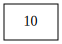

Llave insertada en nodo hoja.
Llave insertada: 20


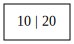

Llave insertada en nodo hoja.
Llave insertada: 5


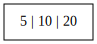

Llave insertada en nodo hoja.
Llave insertada: 6


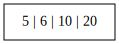

Llave insertada en nodo hoja.
Llave insertada: 12


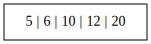

Nodo BTree inicializado
Nodo BTree inicializado como hoja
Nodo hijo dividido en dos nodos.
Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 30


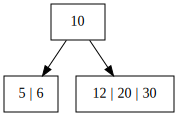

Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 7


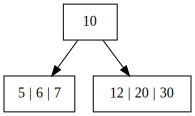

Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 17


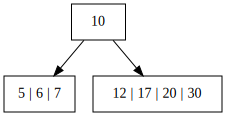

Todas las inserciones pasaron la verificación del árbol B.


In [4]:
# Asumiendo que esta es la inicialización correcta para tu estructura de árbol B
btree = BTree(t=3)
keys_to_insert = [10, 20, 5, 6, 12, 30, 7, 17]

for key in keys_to_insert:
    btree.insert(key)
    # Visualizar el árbol
    dot = visualize_b_tree(btree.root)
    display(dot)
    assert verify_tree_properties(btree.root, btree.t), "Fallo en " + str(key)

print("Todas las inserciones pasaron la verificación del árbol B.")

Este script inserta una serie de claves en el árbol B y verifica después de cada inserción que el árbol sigue cumpliendo con sus propiedades. Si alguna de las inserciones rompe la estructura del árbol B, la aserción fallará, indicando un problema en el proceso de inserción o en la lógica de división de nodos.

## Complejidad del Algoritmo

- **Complejidad de Tiempo:** La inserción en un árbol B tiene una complejidad de tiempo de O(log n) , donde  `n` es el número de claves en el árbol. Esto se debe a que cada operación de inserción puede requerir un máximo de un descenso por el árbol desde la raíz hasta una hoja, y cada descenso implica atravesar a lo máximo log n nodos.
- **Complejidad del Espacio:** La complejidad del espacio es O(t) debido a la necesidad de almacenar temporalmente nodos adicionales durante la división de nodos llenos. 